**To determine the outcome of the harvest season : whether the crop would turn out to be healthy or damaged** 

**Libraries**

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Dataset**

In [2]:
# loading the dataset

agri_train = pd.read_csv("train_agriculture.csv")
agri_train["source"]="train"
agri_test=pd.read_excel("test_agriculture.xlsx")
agri_test["source"]="test"

ag=agri_train
ag.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.0,0,1,0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1,train
2,F00000004,257,1,0,1,0,0.0,0,2,1,train
3,F00000005,257,1,1,1,0,0.0,0,2,1,train
4,F00000006,342,1,0,1,0,0.0,0,2,1,train


**Data Preprocessing**

In [3]:
ag.shape

(88858, 11)

the dataset 
number of rows: 88858
number of columns: 11

In [4]:
ag.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage', 'source'],
      dtype='object')

In [5]:
# finding datatypes 
ag.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
source                      object
dtype: object

In [6]:
ag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
 10  source                   88858 non-null  object 
dtypes: float64(1), int64(8), object(2)
memory usage: 7.5+ MB


In [7]:
ag.nunique()

ID                         88858
Estimated_Insects_Count       71
Crop_Type                      2
Soil_Type                      2
Pesticide_Use_Category         3
Number_Doses_Week             20
Number_Weeks_Used             64
Number_Weeks_Quit             51
Season                         3
Crop_Damage                    3
source                         1
dtype: int64

**Finding and dealing with NULL values**

In [8]:
ag.isnull().any()

ID                         False
Estimated_Insects_Count    False
Crop_Type                  False
Soil_Type                  False
Pesticide_Use_Category     False
Number_Doses_Week          False
Number_Weeks_Used           True
Number_Weeks_Quit          False
Season                     False
Crop_Damage                False
source                     False
dtype: bool

In [9]:
ag.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
source                        0
dtype: int64

**"Number_Weeks_Used" column has 9000 null values. Now, we find mode of the column data and replace these null values with the obtained mode**

In [10]:
ag['Number_Weeks_Used'].fillna(ag['Number_Weeks_Used'].mean(),inplace=True)
ag.isnull().sum()

# all null values have been replaced

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
source                     0
dtype: int64

**Removal of any outliers**

In [11]:
ag.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,11.747567,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.623970,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


**observing this, outliers can be seen in the following columns: Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Quit**

In [12]:
# dropping ID column and source column

ag.drop(columns=['ID'],axis=1,inplace=True)
ag.drop(columns=['source'],axis=1,inplace=True)
ag.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


**Boxplot for outlier detection**

Estimated_Insects_Count       AxesSubplot(0.125,0.772143;0.110714x0.107857)
Crop_Type                  AxesSubplot(0.257857,0.772143;0.110714x0.107857)
Soil_Type                  AxesSubplot(0.390714,0.772143;0.110714x0.107857)
Pesticide_Use_Category     AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Number_Doses_Week          AxesSubplot(0.656429,0.772143;0.110714x0.107857)
Number_Weeks_Used          AxesSubplot(0.789286,0.772143;0.110714x0.107857)
Number_Weeks_Quit             AxesSubplot(0.125,0.642714;0.110714x0.107857)
Season                     AxesSubplot(0.257857,0.642714;0.110714x0.107857)
Crop_Damage                AxesSubplot(0.390714,0.642714;0.110714x0.107857)
dtype: object

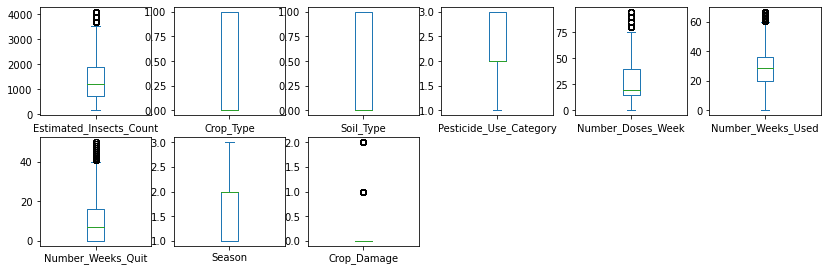

In [13]:
ag.plot(kind="box",subplots=True,layout=(6,6),figsize=(14,14))

**From the above obtained box-plots, outliers can be seen in:
Estimated_Insects_Count,
Number_Doses_Week,
Number_Weeks_Used,
Number_Weeks_Quit**

In [14]:
#finding the mean value of each column and replacing it with the outlier values

ag.loc[ag['Estimated_Insects_Count']>3600,'Estimated_Insects_Count'] = np.mean(ag["Estimated_Insects_Count"])
ag.loc[ag['Number_Doses_Week']>70,'Number_Doses_Week'] = np.mean(ag["Number_Doses_Week"])
ag.loc[ag['Number_Weeks_Used']>60,'Number_Weeks_Used'] = np.mean(ag["Number_Weeks_Used"])
ag.loc[ag['Number_Weeks_Quit']>40,'Number_Weeks_Quit'] = np.mean(ag["Number_Weeks_Quit"])

Estimated_Insects_Count       AxesSubplot(0.125,0.772143;0.110714x0.107857)
Crop_Type                  AxesSubplot(0.257857,0.772143;0.110714x0.107857)
Soil_Type                  AxesSubplot(0.390714,0.772143;0.110714x0.107857)
Pesticide_Use_Category     AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Number_Doses_Week          AxesSubplot(0.656429,0.772143;0.110714x0.107857)
Number_Weeks_Used          AxesSubplot(0.789286,0.772143;0.110714x0.107857)
Number_Weeks_Quit             AxesSubplot(0.125,0.642714;0.110714x0.107857)
Season                     AxesSubplot(0.257857,0.642714;0.110714x0.107857)
Crop_Damage                AxesSubplot(0.390714,0.642714;0.110714x0.107857)
dtype: object

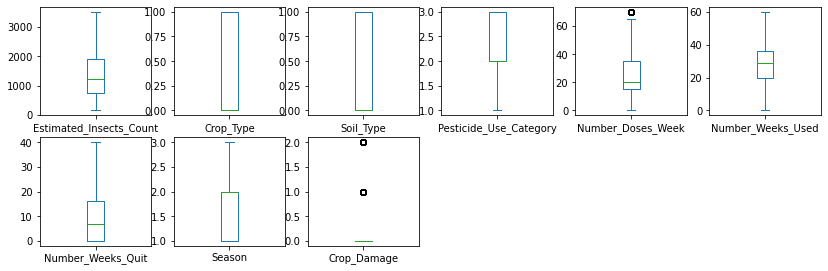

In [15]:
ag.plot(kind="box",subplots=True,layout=(6,6),figsize=(14,14))

**Exploratory Data Analysis**

**Heatmap**

<AxesSubplot:>

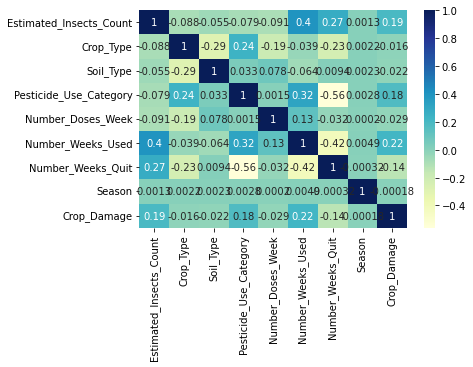

In [17]:
sns.heatmap(ag.corr(),annot=True,cmap='YlGnBu')

**We need to find correlation with Crop_Damage**

**The categories which are positively correlated with crop damage are found to be :**

**Estimated_Insects_Count,  Pesticide_Use_Category,  Number_Weeks_Used**

**Catplot**

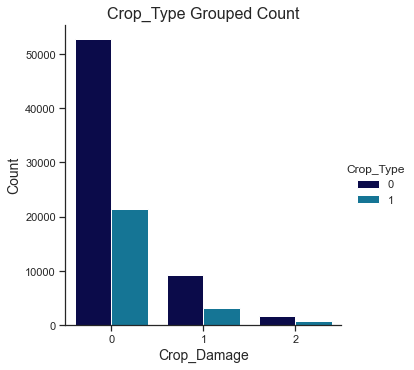

In [30]:
sns.catplot(x='Crop_Damage',data=ag,palette="ocean",kind='count',hue='Crop_Type')
plt.title("Crop_Type Grouped Count",fontsize=16)
plt.xlabel("Crop_Damage",fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

**From the above catplot, we can observe that crop 0 has higher chances of survival compared to crop 1**
<br>**Damage due to pesticides is less comapred to others**

<Figure size 864x360 with 0 Axes>

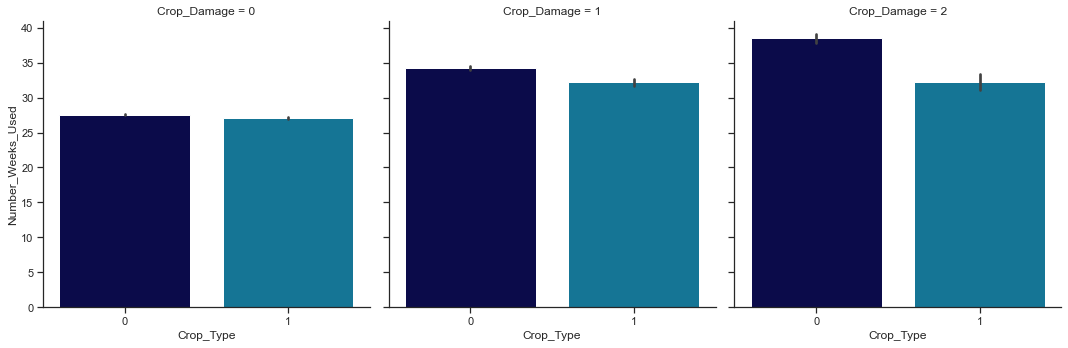

In [63]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Type',y='Number_Weeks_Used',data=ag, palette="ocean",kind='bar',col='Crop_Damage')
plt.show()

**From the above 3 graphs, it is observed that :**
<br>**Crop 0 is more affected by pesticides and gets more damaged as compared to crop 1.**
<br>**Duration of pesticide damage is lower for crop 1 than crop 0.**

**Countplot**

Text(0.5, 1.0, 'Crop Damage vs Pesticide Use Category ')

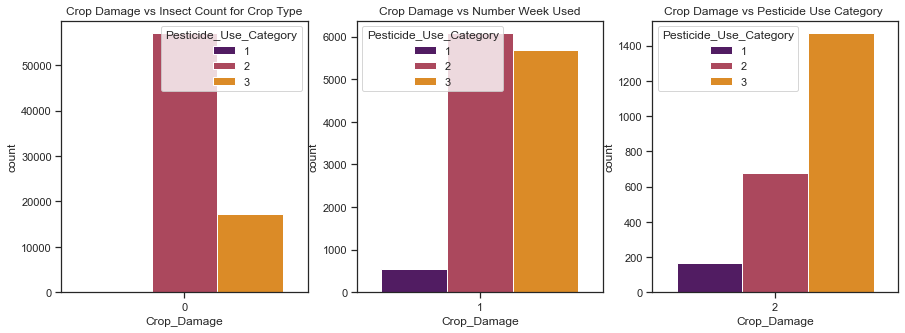

In [70]:
fig, [ax1,ax2,ax3] = plt.subplots(nrows=1,ncols=3,figsize=(15,5))

ax1=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=ag[ag["Crop_Damage"]==0],ax=ax1,palette="inferno")
ax1.set_title("Crop Damage vs Insect Count for Crop Type")

ax2=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=ag[ag["Crop_Damage"]==1],ax=ax2,palette="inferno")
ax2.set_title("Crop Damage vs Number Week Used")

ax3=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=ag[ag["Crop_Damage"]==2],ax=ax3,palette="inferno")
ax3.set_title("Crop Damage vs Pesticide Use Category ")

**From the above plots, type 2 pesticide is safer to use than type 3.**

**Histplot**

<Figure size 1440x720 with 0 Axes>

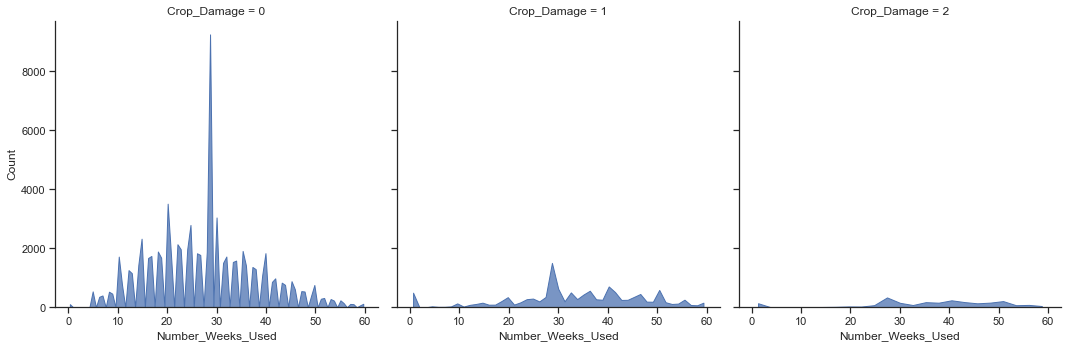

In [58]:
plt.figure(figsize=(20,10))
grp= sns.FacetGrid(ag, col='Crop_Damage',height=5)
grp = grp.map(sns.histplot, "Number_Weeks_Used",element="poly")
plt.show()

**Graph 1 :**
<br>**Till week 25 approx, damage due to pesticides is comparitively less**
<br>**Graph 2 and 3 :**
<br>**After week 25, damage increases significantly**

**Barplot**

<AxesSubplot:xlabel='Crop_Damage', ylabel='Estimated_Insects_Count'>

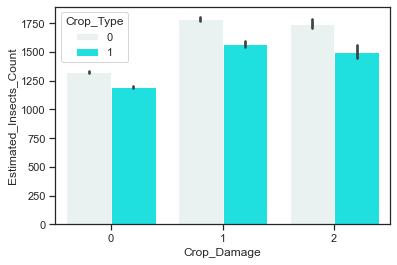

In [71]:
sns.barplot(x="Crop_Damage",y="Estimated_Insects_Count",hue="Crop_Type",data=ag,color="cyan")

**From the barplot, it's observed that insects attack more on crop 0 compared to crop 1**

**SKEW ANALYSIS**

In [72]:
ag.skew()

Estimated_Insects_Count    0.699465
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.744487
Number_Weeks_Used          0.213554
Number_Weeks_Quit          0.831183
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

**Data: Estimated_Insects_Count, Crop_Type, Pesticide_Use_Category, Number_Doses_Week, Number_Weeks_Quit: moderately skewed**
<br>**Data: Soil_Type, Number_Weeks_Used, Season: fairly symmetrical**

In [85]:
ag.kurt()

Estimated_Insects_Count   -0.229338
Crop_Type                 -1.086131
Soil_Type                 -1.972184
Pesticide_Use_Category    -0.630011
Number_Doses_Week         -0.007164
Number_Weeks_Used         -0.228283
Number_Weeks_Quit         -0.206514
Season                    -0.967584
Crop_Damage                4.978762
dtype: float64

**Based on the obove obtained kurtosis, we can observe that this data is a platykurtic(Kurtosis <3) distribution i.e. a flat distribution where the values are moderately spread out**

array([[<AxesSubplot:title={'center':'Estimated_Insects_Count'}>,
        <AxesSubplot:title={'center':'Crop_Type'}>,
        <AxesSubplot:title={'center':'Soil_Type'}>,
        <AxesSubplot:title={'center':'Pesticide_Use_Category'}>],
       [<AxesSubplot:title={'center':'Number_Doses_Week'}>,
        <AxesSubplot:title={'center':'Number_Weeks_Used'}>,
        <AxesSubplot:title={'center':'Number_Weeks_Quit'}>,
        <AxesSubplot:title={'center':'Season'}>],
       [<AxesSubplot:title={'center':'Crop_Damage'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

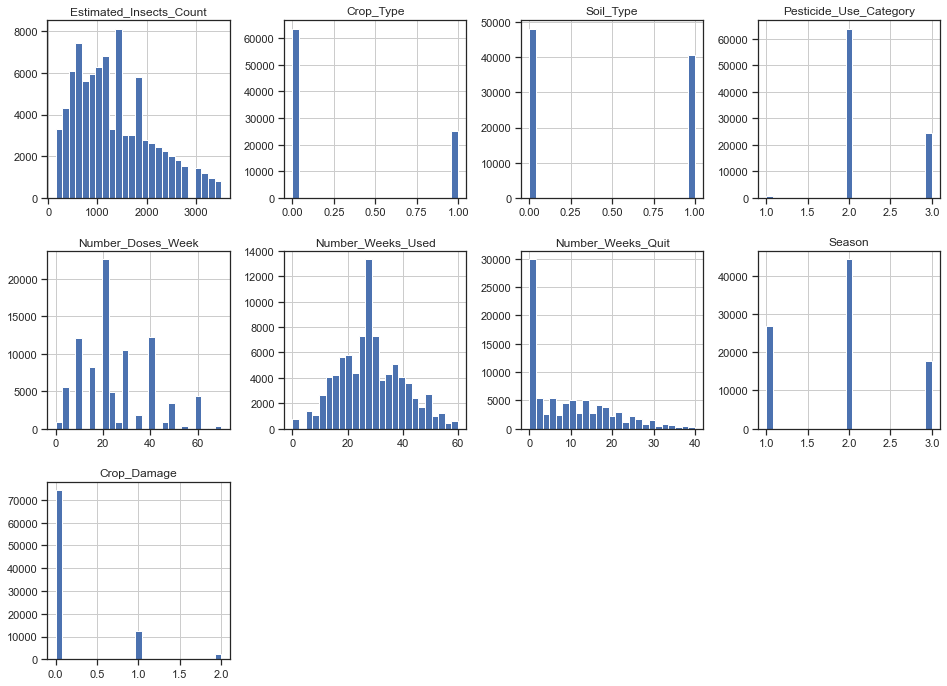

In [84]:
ag.hist(figsize=(16,16),layout=(4,4),bins=25)

**evenly spread distribution is observed**

**ML CLASSIFIER MODELS**

In [89]:
#Importing libraries

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV


In [90]:
x_train=ag.drop(columns=['Crop_Damage'])
y_train=ag[["Crop_Damage"]]

x_train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188.0,1,0,1,0.0,0.0,0.0,1
1,209.0,1,0,1,0.0,0.0,0.0,2
2,257.0,1,0,1,0.0,0.0,0.0,2
3,257.0,1,1,1,0.0,0.0,0.0,2
4,342.0,1,0,1,0.0,0.0,0.0,2


In [99]:
y_train.head()

,Crop_Damage
0,0
1,1
2,1
3,1
4,1


In [101]:
#Scaling the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_s = sc.fit_transform(x_train)
x_train=pd.DataFrame(x_train_s,columns=x_train.columns)

x_train.head()

,0,1,2,3,4,5,6,7
0,-1.487238,1.586343,-0.920021,-2.737701,-1.739015,-2.461344,-0.977842,-1.278962
1,-1.460561,1.586343,-0.920021,-2.737701,-1.739015,-2.461344,-0.977842,0.146924
2,-1.399586,1.586343,-0.920021,-2.737701,-1.739015,-2.461344,-0.977842,0.146924
3,-1.399586,1.586343,1.086932,-2.737701,-1.739015,-2.461344,-0.977842,0.146924
4,-1.291608,1.586343,-0.920021,-2.737701,-1.739015,-2.461344,-0.977842,0.146924


In [103]:
#defining a function to find accuracy score, crossvalidation score for the given dataset

def max_acc_score(names,model_c,x,y):
    
    accuracy_scr_max = 0
    
    for r_state in range(42,100):
        
        train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33,stratify = y)
        model_c.fit(train_x,train_y)
        
        accuracy_scr = accuracy_score(test_y,model_c.predict(test_x))
        
        if accuracy_scr> accuracy_scr_max:
            accuracy_scr_max=accuracy_scr
            final_state = r_state
            final_model = model_c
            
            mean_acc = cross_val_score(final_model,x,y,cv=5,scoring="accuracy").mean()
            std_dev = cross_val_score(final_model,x,y,cv=5,scoring="accuracy").std()
            cross_val = cross_val_score(final_model,x,y,cv=5,scoring="accuracy")
    
    print('\033[1m',"Results for model : ",names,'\n','\033[0m'
          "max accuracy score is" , accuracy_scr_max ,'\n',
          "Mean accuracy score is : ",mean_acc,'\n',
          "Std deviation score is : ",std_dev,'\n',
          "Cross validation scores are :  " ,cross_val) 
    
    print("-"*100)

In [105]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 
accuracy_scr_max = []
accuracy=[]
std_dev=[]
mean_acc=[]
cross_val=[]
models=[]

models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))

for names,model_c in models:
    max_acc_score(names,model_c,x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

 Results for model :  KNN 
 max accuracy score is 0.8307870686127404 
 Mean accuracy score is :  0.8278939507402254 
 Std deviation score is :  0.0016142378230195366 
 Cross validation scores are :   [0.82995724 0.82793158 0.82511816 0.82887851 0.82758427]
----------------------------------------------------------------------------------------------------
 Results for model :  Decision Tree Classifier 
 max accuracy score is 0.7546378393125085 
 Mean accuracy score is :  0.7487001990829059 
 Std deviation score is :  0.0015754305634090766 
 Cross validation scores are :   [0.7498312  0.74859329 0.745386   0.75021102 0.75111136]
----------------------------------------------------------------------------------------------------


C:\Users\DELL\AppData\Local\Temp/ipykernel_652/3789874877.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_c.fit(train_xc,train_yc)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

 Results for model :  Random Forest 
 max accuracy score is 0.8285022507161369 
 Mean accuracy score is :  0.8235837157176809 
 Std deviation score is :  0.0016785887237225283 
 Cross validation scores are :   [0.82635607 0.8241616  0.82027909 0.82403916 0.82499578]
----------------------------------------------------------------------------------------------------


**Thus, KNN is showing relaively greater accuracy among all the 3 models**
<br> **Using Grid Search CV to find the optimim parmater n :**

In [111]:
kNN=KNeighborsClassifier()
parameters={"n_neighbors":range(2,30)}
c=GridSearchCV(kNN,parameters,cv=5,scoring="accuracy")
c.fit(x_train,y_train)
c.best_params_

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

{'n_neighbors': 20}

In [112]:
#Again running KNeighborsClassifier with n_neighbor = 20

kNN=KNeighborsClassifier(n_neighbors=20)
max_acc_score("KNeighbors Classifier",kNN,x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

 Results for model :  KNeighbors Classifier 
 max accuracy score is 0.8442913654344564 
 Mean accuracy score is :  0.842141373623542 
 Std deviation score is :  0.001602548634088536 
 Cross validation scores are :   [0.84396804 0.84289894 0.8413797  0.84305892 0.83940127]
----------------------------------------------------------------------------------------------------


In [113]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_train,y_train,random_state = 80,test_size=0.20,stratify=y_train)
kNN.fit(x1_train,y1_train)
y1_pred=kNN.predict(x1_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy score is :  0.8405919423812739
classification report 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91     14848
           1       0.48      0.18      0.26      2461
           2       0.33      0.00      0.00       463

    accuracy                           0.84     17772
   macro avg       0.56      0.39      0.39     17772
weighted avg       0.79      0.84      0.80     17772



<AxesSubplot:>

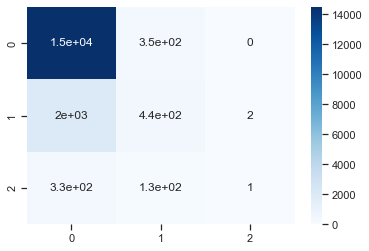

In [114]:
print("accuracy score is : ",accuracy_score(y1_test,y1_pred))
print("classification report \n",classification_report(y1_test,y1_pred))
cnf = confusion_matrix(y1_test,y1_pred)
sns.heatmap(cnf, annot=True, cmap = "Blues")

**Final model is KNN**